# Thumb movement analysis

As a step up from [neuro-breakout](https://github.com/PerlinWarp/Neuro-Breakout) and trying to use the leap motion, 30 seconds of data has been gathered using the hand. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Thumb data was gathered on April 7th, at 11:00 using [this](https://github.com/PerlinWarp/NeuroLeap/commit/bada08c0952166a022f91bd76fc68fd225dff1b8) commit.

Important parts of this commit was that data was gathered using:
```
m = MyoRaw(raw=False, filtered=True) # 50Hz Filtered Myo data

...

	def get_points():
		frame = controller.frame()
		hand = frame.hands.rightmost
		if not hand.is_valid: return None
		fingers = hand.fingers
		X = [-1 * finger.stabilized_tip_position.x for finger in fingers]
		X.append(-1 * hand.palm_position.x)
		Y = [finger.stabilized_tip_position.y for finger in fingers]
		Y.append(hand.palm_position.y)
		Z = [finger.stabilized_tip_position.z for finger in fingers]
		Z.append(hand.palm_position.z)
		return np.array([X, Z, Y])
```

Note the **stabilized tip positions** from the [documentation](https://developer-archive.leapmotion.com/documentation/python/api/Leap.Pointable.html#Leap.Pointable.stabilized_tip_position):
  
Smoothing and stabilization is performed in order to make this value more suitable for interaction with 2D content. The stabilized position lags behind the tip position by a variable amount, depending primarily on the speed of movement.


In [19]:
data = pd.read_csv("Datasets/thumb_data_30.csv")

In [20]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Thumb_tip_x,Thumb_tip_y,...,Middle_tip_z,Ring_tip_x,Ring_tip_y,Ring_tip_z,Pinky_tip_x,Pinky_tip_y,Pinky_tip_z,Palm_tip_x,Palm_tip_y,Palm_tip_z
0,51,144,121,85,51,23,20,20,44.484539,17.552259,...,-56.443241,-51.710705,-31.208664,29.706217,152.516052,160.874146,152.604523,149.898438,144.026169,156.059280
1,61,173,129,83,58,26,21,20,44.484390,17.552156,...,-56.445084,-51.712929,-31.210434,29.007427,152.514648,160.873459,152.603561,149.897171,144.025131,155.940491
2,67,190,143,85,60,29,18,21,44.484344,17.552126,...,-56.445572,-51.713497,-31.210815,28.734943,152.514206,160.873260,152.603317,149.896851,144.024918,155.890503
3,72,203,139,87,61,29,19,21,44.484306,17.552109,...,-56.445820,-51.713856,-31.211000,28.469938,152.513855,160.873154,152.603195,149.896652,144.024811,155.820114
4,76,217,143,88,64,32,18,21,44.484272,17.552099,...,-56.445953,-51.714077,-31.211121,28.223940,152.513489,160.873062,152.603134,149.896530,144.024750,155.756973


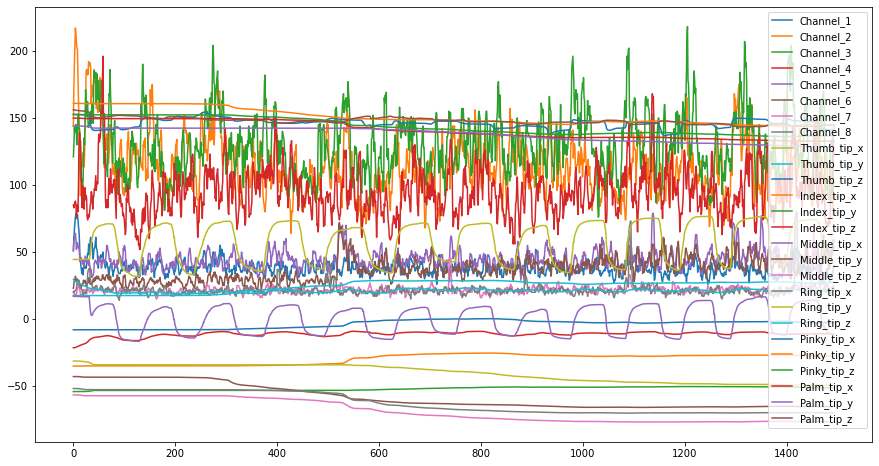

In [21]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

data.plot()

In [22]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z', 'Index_tip_x', 'Index_tip_y', 'Index_tip_z',
       'Middle_tip_x', 'Middle_tip_y', 'Middle_tip_z', 'Ring_tip_x',
       'Ring_tip_y', 'Ring_tip_z', 'Pinky_tip_x', 'Pinky_tip_y', 'Pinky_tip_z',
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z'],
      dtype='object')

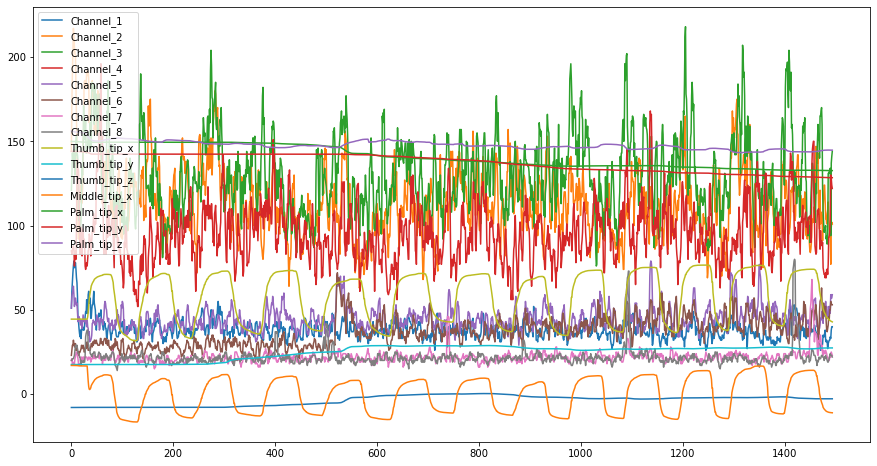

In [23]:
# Removing columns we do not care about
care_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z','Middle_tip_x',
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[care_cols]
df.plot()

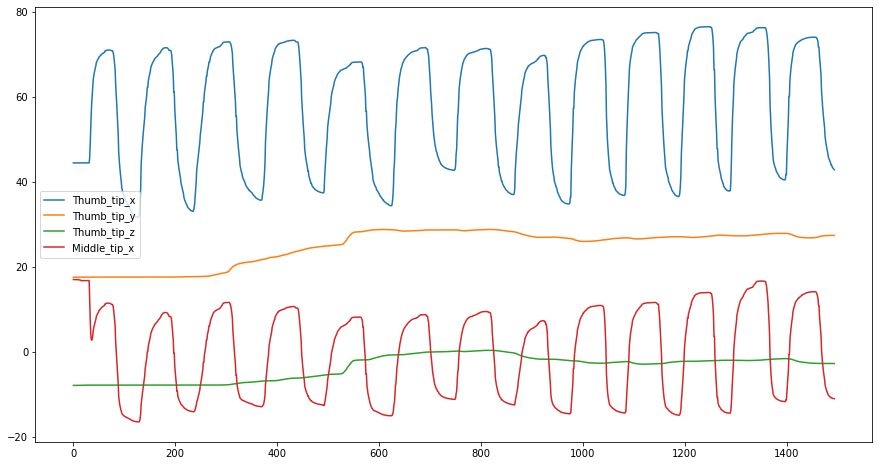

In [26]:
# Removing columns we do not care about
care_cols = ['Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z','Middle_tip_x']
df = data[care_cols]
df.plot()

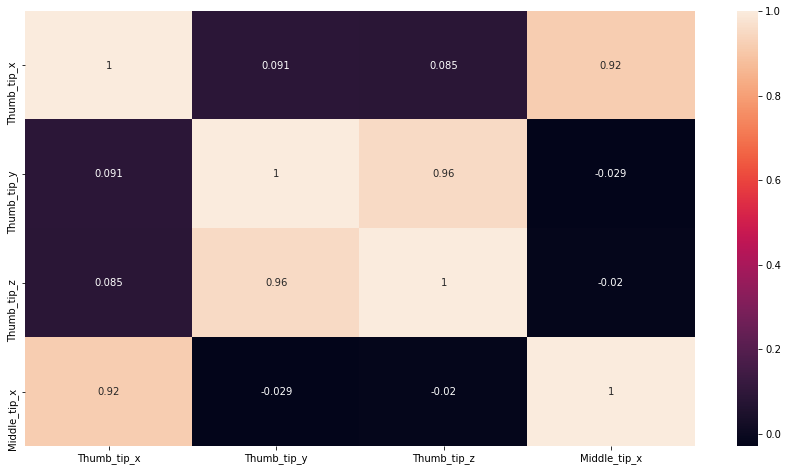

In [29]:
sns.heatmap(df.corr(), annot=True)

Watching the recording of the footage back using ``python3 animate_saved.py`` does not show the tip of the middle finger moving, however on the video we can see the palm position move very slightly in the x direction. 


The more obvious movement in the dataset is the movement of the thumb in the y axis, which according to the data does not seem to be moving. Therefore my labelling of the columns is wrong. 

Column names were generated using:
```
			# Combine the data and record to a df
			myo_cols = ["Channel_1", "Channel_2", "Channel_3", "Channel_4", "Channel_5", "Channel_6", "Channel_7", "Channel_8"]
			leap_cols = []
			finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Palm']
			# We can of course generate column names on the fly:
			for finger in finger_names:
				for dim in ["x","y","z"]:
						leap_cols.append(f"{finger}_tip_{dim}")
```

In [30]:
# Combine the data and record to a df
myo_cols = ["Channel_1", "Channel_2", "Channel_3", "Channel_4", "Channel_5", "Channel_6", "Channel_7", "Channel_8"]
leap_cols = []
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Palm']
# We can of course generate column names on the fly:
for finger in finger_names:
    for dim in ["x","y","z"]:
        leap_cols.append(f"{finger}_tip_{dim}")
        
leap_cols

['Thumb_tip_x',
 'Thumb_tip_y',
 'Thumb_tip_z',
 'Index_tip_x',
 'Index_tip_y',
 'Index_tip_z',
 'Middle_tip_x',
 'Middle_tip_y',
 'Middle_tip_z',
 'Ring_tip_x',
 'Ring_tip_y',
 'Ring_tip_z',
 'Pinky_tip_x',
 'Pinky_tip_y',
 'Pinky_tip_z',
 'Palm_tip_x',
 'Palm_tip_y',
 'Palm_tip_z']

In [32]:
# Combine the data and record to a df
myo_cols = ["Channel_1", "Channel_2", "Channel_3", "Channel_4", "Channel_5", "Channel_6", "Channel_7", "Channel_8"]
leap_cols2 = []
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Palm']
# We can of course generate column names on the fly:
for dim in ["x","y","z"]:
    for finger in finger_names:
        leap_cols2.append(f"{finger}_tip_{dim}")
        
leap_cols2

['Thumb_tip_x',
 'Index_tip_x',
 'Middle_tip_x',
 'Ring_tip_x',
 'Pinky_tip_x',
 'Palm_tip_x',
 'Thumb_tip_y',
 'Index_tip_y',
 'Middle_tip_y',
 'Ring_tip_y',
 'Pinky_tip_y',
 'Palm_tip_y',
 'Thumb_tip_z',
 'Index_tip_z',
 'Middle_tip_z',
 'Ring_tip_z',
 'Pinky_tip_z',
 'Palm_tip_z']

	def get_points():
		frame = controller.frame()
		hand = frame.hands.rightmost
		if not hand.is_valid: return None
		fingers = hand.fingers
		X = [-1 * finger.stabilized_tip_position.x for finger in fingers]
		X.append(-1 * hand.palm_position.x)
		Y = [finger.stabilized_tip_position.y for finger in fingers]
		Y.append(hand.palm_position.y)
		Z = [finger.stabilized_tip_position.z for finger in fingers]
		Z.append(hand.palm_position.z)
		return np.array([X, Z, Y])

We can see that a misslabelling of the data has been done. 

To agree with the complex hand plotting, we will add palm data first:

	def get_points():
		frame = controller.frame()
		hand = frame.hands.rightmost
		if not hand.is_valid: return None
		fingers = hand.fingers

		X = []
		Y = []
		Z = []

		# Add the position of the palms
		X.append(-1 *hand.palm_position.x)
		Y.append(hand.palm_position.y)
		Z.append(hand.palm_position.z)

		for finger in fingers:
			# Add finger tip positions
			X.append(-1 * finger.stabilized_tip_position.x)
			Y.append(finger.stabilized_tip_position.y)
			Z.append(finger.stabilized_tip_position.z) 
		return np.array([X, Z, Y])
        
Therefore you may think the decode looks like:

			leap_cols = []
			finger_names = ['Palm', 'Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
			# We can of course generate column names on the fly:
			# Note the ordering being different to the order we pack them in. 
			
			for finger in finger_names:
                for dim in ["x","y","z"]:
					leap_cols.append(f"{finger}_tip_{dim}")

			myo_df = pd.DataFrame(myo_data, columns=myo_cols)
			leap_df = pd.DataFrame(leap_data, columns=leap_cols)
            
But this is incorrect, and running a simple example shows us why:

In [27]:
X = ['palm_x', 'thumb_x']
Y = ['palm_y', 'thumb_y']
Z = ['palm_z', 'thumb_z']

leap_data = np.array([X,Z,Y]).flatten()

leap_data

array(['palm_x', 'thumb_x', 'palm_z', 'thumb_z', 'palm_y', 'thumb_y'],
      dtype='<U7')

In [28]:
leap_cols = []
for finger in ['palm', 'thumb']:
    for dim in ["x","y","z"]:
            leap_cols.append(f"{finger}_tip_{dim}")
            
leap_cols

['palm_tip_x',
 'palm_tip_y',
 'palm_tip_z',
 'thumb_tip_x',
 'thumb_tip_y',
 'thumb_tip_z']

In [29]:
pd.DataFrame([leap_data], columns=leap_cols)

,palm_tip_x,palm_tip_y,palm_tip_z,thumb_tip_x,thumb_tip_y,thumb_tip_z
0,palm_x,thumb_x,palm_z,thumb_z,palm_y,thumb_y


We can see these do not align, this was the problem, therefore we have two options:

In [30]:
leap_data.T

array(['palm_x', 'thumb_x', 'palm_z', 'thumb_z', 'palm_y', 'thumb_y'],
      dtype='<U7')

However this would break out plotting functions if we transposed before flattening. 
So we can do this:

In [31]:
leap_cols = []
for dim in ["x","y","z"]:
    for finger in ['palm', 'thumb']:
            leap_cols.append(f"{finger}_tip_{dim}")
            
leap_cols

['palm_tip_x',
 'thumb_tip_x',
 'palm_tip_y',
 'thumb_tip_y',
 'palm_tip_z',
 'thumb_tip_z']

In [32]:
pd.DataFrame([leap_data], columns=leap_cols)

,palm_tip_x,thumb_tip_x,palm_tip_y,thumb_tip_y,palm_tip_z,thumb_tip_z
0,palm_x,thumb_x,palm_z,thumb_z,palm_y,thumb_y


They now align. 